# Introdução

O naufrágio do RMS Titanic em 15 de abril de 1912 foi um dos eventos mais trágicos e marcantes da história marítima. O acidente ocorreu quando o navio, que era considerado "inafundável", colidiu com um iceberg no Atlântico Norte durante sua viagem inaugural de Southampton, Reino Unido, com destino a Nova York, Estados Unidos. O Titanic era considerado uma maravilha da engenharia, com recursos inovadores e luxuosos, sendo conhecido como o maior e mais seguro navio de sua época.

No entanto, a tragédia ocorreu em meio à falta de botes salva-vidas suficientes para todos os passageiros e tripulantes a bordo, o que resultou em uma devastadora perda de vidas. Dos mais de 2.200 passageiros e tripulantes a bordo, apenas cerca de 700 sobreviveram.

# Objetivo do Projeto

Neste notebook, vamos abordar o famoso problema de aprendizado de máquina "Titanic: Machine Learning from Disaster". O objetivo é construir um modelo preditivo que possa analisar e prever se um passageiro do Titanic sobreviveria ou não ao desastre, com base em características como idade, gênero, classe, cabine, entre outros.

Para isso, utilizaremos um conjunto de dados que contém informações sobre os passageiros do Titanic, incluindo detalhes sobre idade, sexo, classe, cabine, número de parentes a bordo e se sobreviveram ou não. Faremos uma análise exploratória dos dados, realizaremos a limpeza e preparação dos mesmos e, em seguida, treinaremos e avaliaremos vários modelos de aprendizado de máquina para determinar qual é o mais adequado para realizar previsões precisas.

Esse projeto não só proporcionará um excelente aprendizado sobre técnicas de análise de dados e machine learning, mas também nos permitirá mergulhar na história do Titanic. Vamos começar nossa jornada rumo à resolução desse desafio!


# Importando bibliotecas

In [81]:
import pandas as pd
import numpy as np 
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

#biblioteca para balancear os dados utilizando over_sampling
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import GridSearchCV, KFold


In [82]:
# Definir a random seed para NumPy
SEED = 22
np.random.seed(SEED)

# Análise, Exploração dos Dados e Pré-processamento

In [83]:
treino = pd.read_csv('Data/train.csv')
teste = pd.read_csv('Data/test.csv')
data = [treino, teste]

In [84]:
treino

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [85]:
teste

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Descrição dos dados

**survival**: Sobrevivência - Indica se o passageiro sobreviveu (1 = Sim, 0 = Não).

**pclass**: Classe do Bilhete - Classe do bilhete do passageiro (1 = 1ª classe, 2 = 2ª classe, 3 = 3ª classe).

**sex**: Sexo - Gênero do passageiro (masculino ou feminino).

**Age**: Idade - Idade do passageiro em anos.

**sibsp**: nº de irmãos / cônjuges a bordo do Titanic - Número de irmãos ou cônjuges do passageiro a bordo do Titanic.

**parch**: nº de pais / filhos a bordo do Titanic - Número de pais ou filhos do passageiro a bordo do Titanic.

**ticket**: Número do Bilhete - Número do bilhete do passageiro.

**fare**: Tarifa do Passageiro - Tarifa paga pelo passageiro.

**cabin**: Número da Cabine - Número da cabine do passageiro.

**embarked**: Porto de Embarcação - Porto onde o passageiro embarcou no Titanic (C = Cherbourg, Q = Queenstown, S = Southampton).


In [86]:
treino

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [87]:
treino.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [88]:
treino.Survived.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [89]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Informações sobre o DataFrame:

- **Número de Entradas:** O DataFrame possui um total de 891 entradas (linhas).

- **Número de Colunas:** O DataFrame contém 12 colunas (11 caracteristicas + Survived).

- **Categorias e Tipos de Dados:**

  - **Variáveis Categóricas (5 colunas):**
    1. Name: Nome do passageiro (object).
    2. Sex: Gênero do passageiro (object).
    3. Ticket: Número do bilhete do passageiro (object).
    4. Cabin: Número da cabine do passageiro (object).
    5. Embarked: Porto de embarcação do passageiro (object).

  - **Variáveis Numéricas (7 colunas):**
    1. PassengerId: ID único de cada passageiro (int64).
    2. Survived: Indica se o passageiro sobreviveu (0 = Não, 1 = Sim) (int64).
    3. Pclass: Classe do bilhete do passageiro (1 = 1ª classe, 2 = 2ª classe, 3 = 3ª classe) (int64).
    4. Age: Idade do passageiro em anos (float64).
    5. SibSp: Número de irmãos ou cônjuges a bordo do Titanic (int64).
    6. Parch: Número de pais ou filhos a bordo do Titanic (int64).
    7. Fare: Tarifa paga pelo passageiro (float64).

- **Dados Faltantes (Valores Nulos):**
  - Age: 177 dados faltando.
  - Cabin: 687 dados faltando.
  - Embarked: 2 dados faltando.


## Identificação de Títulos nos Nomes dos Passageiros

Ao analisar a coluna "Name" do DataFrame, foi possível identificar que cada nome de passageiro é acompanhado de um título (por exemplo, "Mr.", "Miss.", "Mrs.", etc.), que pode fornecer informações adicionais sobre o gênero ou estado civil do passageiro. Para aproveitar esses títulos como uma característica relevante na análise, criaremos uma nova coluna denominada "Titulo" que conterá apenas os títulos extraídos dos nomes.

Essa abordagem permitirá categorizar os passageiros com base em seus títulos, o que pode ser útil para identificar grupos específicos e entender melhor a distribuição dos títulos presentes na lista de passageiros do Titanic.

Vamos prosseguir com a criação dessa nova coluna, para que possamos utilizar essa informação em nossa análise exploratória e, eventualmente, em nosso modelo preditivo.


In [90]:
for dataset in data:
    dataset['Titulos'] = dataset.Name.str.extract(r',\s(.*?)\.')

In [91]:
treino.Titulos.value_counts()

Titulos
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

## Processo de Agrupamento de Títulos Menos Recorrentes no DataFrame

Ao analisarmos a coluna "Titulos" do nosso DataFrame, identificamos uma variedade de títulos de cortesia associados aos nomes dos passageiros. No entanto, alguns desses títulos possuem uma ocorrência bastante reduzida, representados por apenas uma ou algumas poucas instâncias no conjunto de dados. Para tornar o modelo mais eficiente e evitar uma dispersão excessiva das categorias, decidimos agrupar esses títulos menos recorrentes em uma única categoria denominada "Raro".

O objetivo dessa abordagem é simplificar o conjunto de dados, reduzindo o número de categorias únicas e, ao mesmo tempo, preservar a essência dos títulos mais comuns. Assim, o modelo de aprendizado de máquina será capaz de trabalhar de forma mais eficaz, mantendo a relevância das informações fundamentais.

Após o processo de agrupamento, cada título será representado por um número exclusivo. Segue abaixo a representação numérica correspondente a cada título após a transformação:

- 'Mr': 0
- 'Mrs': 1
- 'Miss': 2
- 'Master': 3
- 'Raro': 4

Essa codificação numérica permitirá que o modelo de machine learning processe as informações de maneira adequada, tornando mais fácil e eficiente a etapa de treinamento e previsão. Dessa forma, obteremos um modelo mais preciso e robusto para prever a sobrevivência dos passageiros do Titanic com base em suas características, incluindo os títulos de cortesia associados aos seus nomes.


In [92]:
for dataset in data:
    # Substituir alguns títulos menos comuns por 'Raro'
    dataset['Titulos'] = dataset['Titulos'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'the Countess'], 'Raro')

    # Substituir o título 'Mlle' por 'Miss' (Mlle é uma abreviação de "Mademoiselle", que significa "Senhorita" em francês)
    dataset['Titulos'] = dataset['Titulos'].replace('Mlle', 'Miss')

    # Substituir o título 'Ms' por 'Miss' (Ms é uma forma de tratamento para mulheres, mas sem especificar se são solteiras ou casadas)
    dataset['Titulos'] = dataset['Titulos'].replace('Ms', 'Miss')

    # Substituir o título 'Mme' por 'Mrs' (Mme é a abreviação de "Madame", que é uma forma de tratamento para mulheres casadas)
    dataset['Titulos'] = dataset['Titulos'].replace('Mme', 'Mrs')

    # Mapear cada título para um número
    dataset['Titulos'] = dataset['Titulos'].map({'Mr': 0, 'Mrs': 1, 'Miss': 2, 'Master': 3, 'Raro': 4})

Temos algumas idades faltando no nosso conjunto de dados. Para resolver esse problema, vamos seguir o seguinte processo:

1. Calcularemos a média e o desvio padrão das idades existentes no dataset.
2. Criaremos uma lista de idades que variam entre a média - desvio padrão e média + desvio padrão.
3. Substituiremos as idades faltantes no dataset pelos valores gerados aleatoriamente nessa lista.

Esse procedimento nos permitirá preencher os valores faltantes de forma mais realista, considerando a distribuição das idades já existentes no conjunto de dados. Dessa forma, teremos uma abordagem mais precisa para lidar com os dados ausentes e garantir a qualidade do nosso modelo preditivo.


In [93]:
for dataset in data:
    # Calcular a média e o desvio padrão da coluna "Age"
    media = dataset['Age'].mean()
    std = dataset['Age'].std()

    # Verificar a quantidade de dados NaN na coluna "Age"
    qtd_nan = dataset['Age'].isnull().sum()

    # Gerar uma lista de valores inteiros aleatórios dentro do intervalo [média - desvio padrão, média + desvio padrão]
    valores_aleatorios = np.random.randint(media - std, media + std, qtd_nan)

    # Substituir os valores faltantes na coluna "Age" pelos valores aleatórios gerados
    dataset.loc[dataset['Age'].isnull(), 'Age'] = valores_aleatorios


## Tratamento das Idades e Tarifas em Categorias

Neste trecho do código, estamos transformando as idades e tarifas dos passageiros em categorias. Utilizamos os quantis para dividir em 5 grupos e atribuímos rótulos numéricos a cada categoria. O resultado é uma nova coluna chamada 'categoria_idade' e 'categoria_tdade' que contém as categorias correspondentes. Isso tornará a idade e tarifa em uma variável categórica para análises e modelos de machine learning.


In [94]:
for dataset in data:
    # Definir os limites dos quantis para as categorias
    # Vamos dividir em 5 categorias
    limites = dataset['Age'].quantile([0, 1/5, 2/5, 3/5, 4/5, 1])

    # Definir os rótulos das categorias
    rotulos = [0, 1, 2, 3, 4]

    # Criar a coluna 'categoria_idade' com as categorias
    dataset['categoria_idade'] = pd.cut(dataset['Age'], bins=limites, labels=rotulos, include_lowest=True)
    
# Calculando a média dos valores não nulos da coluna 'Fare'
media_fare = te['Fare'].mean()

# Preenchendo os valores nulos da coluna 'Fare' com a média
df['Fare'].fillna(media_fare, inplace=True)    


for dataset in data:
    # Definir os limites dos quantis para as categorias
    # Vamos dividir em 5 categorias
    limites = dataset['Fare'].quantile([0, 1/5, 2/5, 3/5, 4/5, 1])

    # Definir os rótulos das categorias
    rotulos = [0, 1, 2, 3, 4]

    # Criar a coluna 'categoria_idade' com as categorias
    dataset['categoria_tarifa'] = pd.cut(dataset['Fare'], bins=limites, labels=rotulos, include_lowest=True)

## Criação das Colunas 'Parentes' e 'Sozinho'

Neste trecho do código, foram criadas duas novas colunas no dataframe. 

A coluna 'Parentes' é o resultado da soma das colunas 'SibSp' (número de irmãos/cônjuges a bordo) e 'Parch' (número de pais/filhos a bordo) para cada passageiro, representando o total de parentes que a pessoa possui no navio.

Já a coluna 'Sozinho' foi criada utilizando a função np.where. Ela recebe o valor 1 para os passageiros que não possuem nenhum parente a bordo (ou seja, a coluna 'Parentes' possui valor igual a zero), indicando que estão viajando sozinhos. Para os demais passageiros, a coluna 'Sozinho' recebe o valor 0, mostrando que eles têm algum parente no navio.


In [95]:
for dataset in data:
    dataset['Parentes'] = dataset['SibSp'] + dataset['Parch']
    dataset['Sozinho'] = np.where(dataset['Parentes'] == 0, 1, 0)


## Separação das Cabines por Decks

No RMS Titanic, as cabines dos passageiros eram organizadas em diferentes decks, e cada deck era identificado por uma letra. Para facilitar a análise dos dados e entender a localização das cabines no navio, vamos realizar a separação das cabines por decks.

Essa separação será feita através da extração da letra que acompanha a identificação de cada cabine no dataframe. Posteriormente, criaremos uma nova coluna chamada 'Deck' para armazenar essa informação.

Com essa abordagem, poderemos analisar como a localização das cabines pode ter influenciado nas chances de sobrevivência dos passageiros, bem como explorar outras características relacionadas aos diferentes decks do Titanic.


In [96]:
for dataset in data:
    # Substituir os valores NaN da coluna 'Cabin' pela letra 'O'
    dataset['Cabin'] = dataset['Cabin'].fillna('O')

    # Pegar a primeira letra de cada palavra na coluna 'Cabin'
    dataset['Deck'] = dataset['Cabin'].str[0]

    # Mapear as letras para os números correspondentes
    letra_para_numero = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7,'T': 8, 'O': 0}
    dataset['Deck'] = dataset['Deck'].map(letra_para_numero)


## Completando Dados Faltantes em 'Embarked' e Transformando Letras em Números

No dataframe 'treino', na coluna 'Embarked', identificamos que existem dois dados faltantes. Para garantir que todas as informações estejam completas, optaremos por preencher esses dados ausentes com o valor mais comum da coluna 'Embarked'.

Após preenchermos os dados faltantes, transformaremos as letras presentes na coluna 'Embarked' em números. Essa etapa é essencial para que possamos utilizar esse atributo categórico em modelos de aprendizado de máquina, pois muitos algoritmos requerem que as variáveis sejam numéricas.

In [97]:
for dataset in data:
    # Verificando o valor mais comum(moda) na coluna 'Embarked'
    valor_comum = dataset['Embarked'].mode()[0]
    
    # Preenchendo os valores nulos com o valor mais comum
    dataset['Embarked'].fillna(valor_comum, inplace=True)
    
    # Mapeando as letras em números
    dataset['Embarked'] = dataset['Embarked'].map({"S": 0, "C": 1, "Q": 2})

## Transformação na coluna Sex

A fim de tornar os dados numéricos e facilitar a análise pelo modelo, vamos substituir os valores 'male' por 0 e 'female' por 1. Essa transformação permitirá que o modelo compreenda e utilize essa informação para realizar as previsões.


In [98]:
treino.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [99]:
for dataset in data:
    # Substituir 'male' por 0 e 'female' por 1
    dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1})

In [100]:
treino.Sex.value_counts()

Sex
0    577
1    314
Name: count, dtype: int64

## Exclusão de Colunas Irrelevantes

Vamos agora excluir algumas colunas que não são relevantes para o nosso modelo de predição, pois elas não contêm informações diretamente relacionadas à sobrevivência dos passageiros. As colunas a serem excluídas são: 'Name', 'Ticket', 'PassengerId' e 'Cabin', uma vez que já temos uma representação mais útil da informação da cabine por meio da coluna 'Deck'.

In [101]:
# Lista das colunas a serem excluídas
colunas_excluir = ['Name', 'Ticket', 'PassengerId', 'Cabin']

# Iterando sobre os datasets (treino e teste) e excluindo as colunas
for dataset in data:
    dataset.drop(colunas_excluir, axis=1, inplace=True)


In [102]:
treino

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titulos,categoria_idade,categoria_tarifa,Parentes,Sozinho,Deck
0,0,3,0,22.0,1,0,7.2500,0,0,1,0,1,0,0
1,1,1,1,38.0,1,0,71.2833,1,1,3,4,1,0,3
2,1,3,1,26.0,0,0,7.9250,0,2,2,1,0,1,0
3,1,1,1,35.0,1,0,53.1000,0,1,3,4,1,0,3
4,0,3,0,35.0,0,0,8.0500,0,0,3,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0,4,2,2,0,1,0
887,1,1,1,19.0,0,0,30.0000,0,2,0,3,0,1,2
888,0,3,1,42.0,1,2,23.4500,0,2,4,3,3,0,0
889,1,1,0,26.0,0,0,30.0000,1,0,2,3,0,1,3


## Trocando duas colunas com dados categoricos para int

In [103]:
# teste.categoria_idade = teste.categoria_idade.cat.codes
# teste.categoria_tarifa = teste.categoria_tarifa.cat.codes

# Algumas análises gráficas

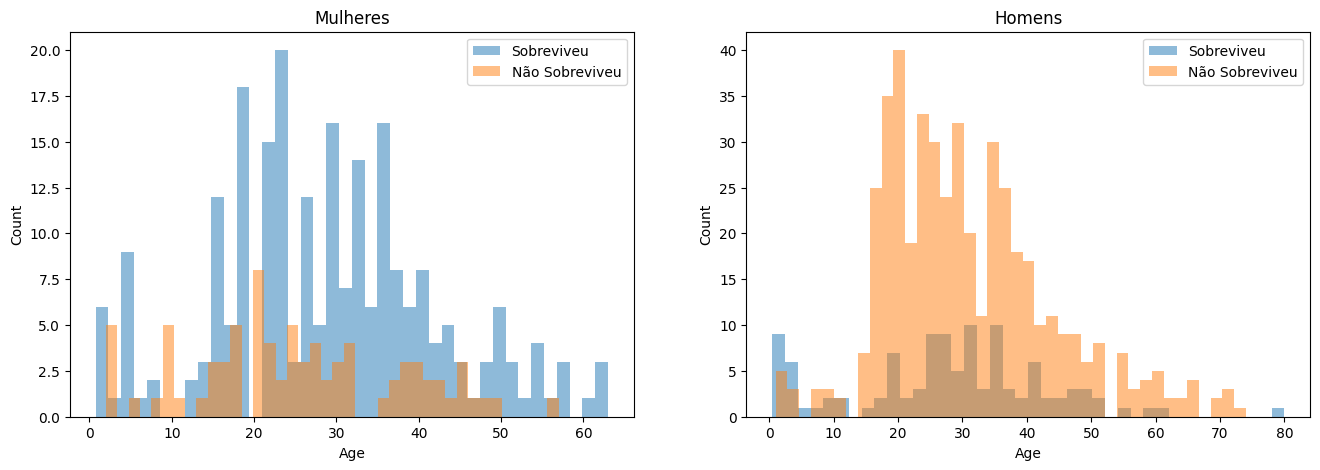

In [104]:
# Definindo rótulos
sobreviveu = 'Sobreviveu'
n_sobreviveu = 'Não Sobreviveu'

# Filtrando os dados por sexo (mulher e homem)
mulher = treino[treino['Sex'] == 1]
homem = treino[treino['Sex'] == 0]

# Criando a figura com duas subplots lado a lado
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

# Subplot 1: Mulheres
ax = sns.histplot(mulher[mulher['Survived'] == 1].Age, bins=40, label=sobreviveu, ax=axes[0], kde=False, alpha=0.5, edgecolor='None')
ax = sns.histplot(mulher[mulher['Survived'] == 0].Age, bins=40, label=n_sobreviveu, ax=axes[0], kde=False, alpha=0.5, edgecolor='None')
ax.legend()
ax.set_title('Mulheres')

# Subplot 2: Homens
ax = sns.histplot(homem[homem['Survived'] == 1].Age, bins=40, label=sobreviveu, ax=axes[1], kde=False, alpha=0.5, edgecolor='None')
ax = sns.histplot(homem[homem['Survived'] == 0].Age, bins=40, label=n_sobreviveu, ax=axes[1], kde=False, alpha=0.5, edgecolor='None')
ax.legend()
ax.set_title('Homens')

# Exibir o gráfico
plt.show()


O gráfico acima apresenta uma análise da probabilidade de sobrevivência no naufrágio do Titanic, dividida por idade e gênero. Observa-se que:

- **Mulheres:** Têm uma maior probabilidade de sobreviver entre 14 e 40 anos. Essa faixa etária mostra uma concentração significativa de sobreviventes em relação aos não sobreviventes.

- **Homens:** Apresentam uma maior chance de sobrevivência entre 20 e 35 anos. Nessa faixa etária, há mais sobreviventes masculinos em relação aos não sobreviventes.

- **Bebês:** Chamam a atenção por também terem uma boa taxa de sobrevivência. Esse fato pode estar relacionado à priorização de crianças no resgate.

De forma geral, as mulheres têm uma maior probabilidade de sobreviver ao desastre do Titanic, reforçando o princípio de "mulheres e crianças primeiro".


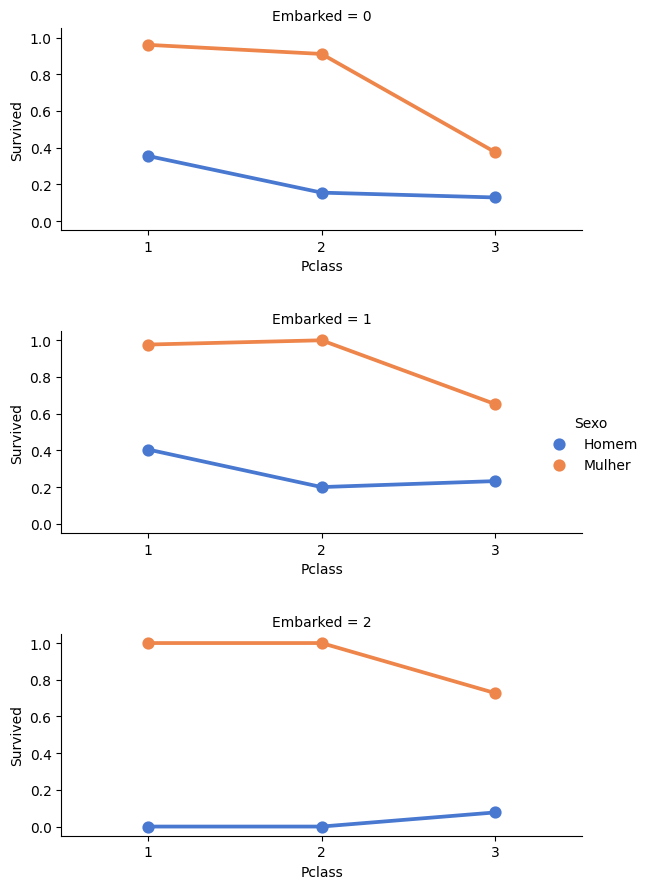

In [105]:
# Crie o FacetGrid
g = sns.FacetGrid(treino, row='Embarked', aspect=2, sharex=False)

# Mapeie o ponto usando sns.pointplot
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette="muted", order=None, hue_order = None, errorbar=None)

# Defina os rótulos dos eixos X e Y para cada plot
for ax in g.axes.flat:
     ax.set_xlabel('Pclass')
     ax.set_ylabel('Survived')

# Aumentar o espaçamento entre os plots (horizontal e vertical)
g.fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Adicione a legenda
g.add_legend(title='Sexo')
new_labels = ['Homem', 'Mulher']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

# Exiba o gráfico
plt.show(g)

No gráfico acima, podemos observar que, independentemente do local de embarque, as mulheres têm uma maior probabilidade de sobrevivência em comparação aos homens. Além disso, podemos notar que os passageiros da 1ª e 2ª classe têm uma maior chance de sobrevivência em relação aos passageiros da 3ª classe.

Legenda:
- "S": 0 (local de embarque em Southampton)
- "C": 1 (local de embarque em Cherbourg)
- "Q": 2 (local de embarque em Queenstown)


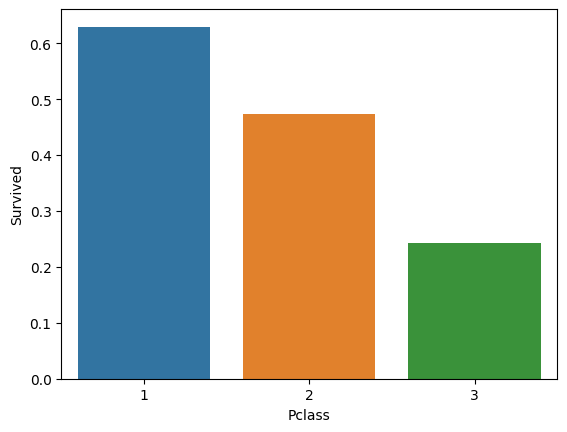

In [106]:
# Plote o gráfico de barras
sns.barplot(x='Pclass', y='Survived', data=treino, errorbar=None)
plt.show()

No gráfico acima, estamos observando a relação de sobrevivência entre as diferentes classes de bilhete (Pclass) dos passageiros do Titanic. Cada barra representa a probabilidade média de sobrevivência para cada classe. Note que a classe 1 apresenta uma maior probabilidade de sobrevivência em comparação com as classes 2 e 3.


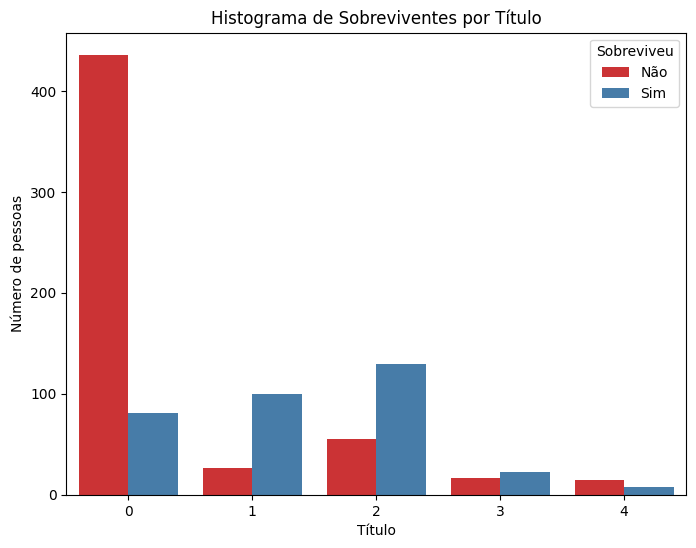

In [107]:
# Criar o histograma com seaborn
plt.figure(figsize=(8, 6))
sns.countplot(x='Titulos', hue='Survived', data=treino, palette='Set1')

# Configurações do gráfico
plt.title('Histograma de Sobreviventes por Título')
plt.xlabel('Título')
plt.ylabel('Número de pessoas')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])

# Exibir o gráfico
plt.show()
# Este código irá criar um histograma com os títulos no eixo x e o número de sobreviventes no eixo y, separados por cor para "Não" e "Sim" na legenda.


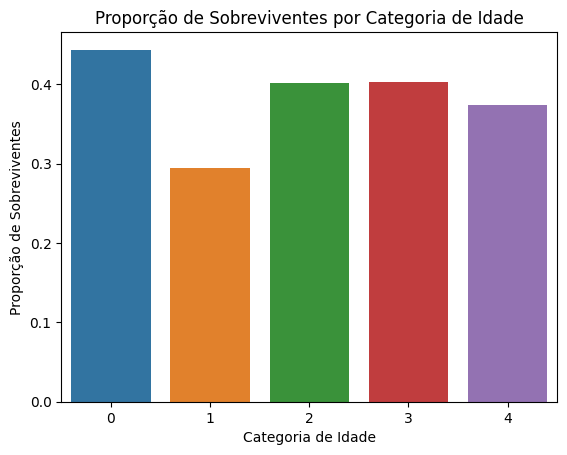

In [108]:
# Calcular a proporção de sobreviventes em cada categoria de idade
proporcao_sobreviventes = treino.groupby('categoria_idade')['Survived'].mean()

# Plotar o gráfico de barras empilhadas
sns.barplot(x='categoria_idade', y='Survived', data=treino, errorbar=None)
plt.title('Proporção de Sobreviventes por Categoria de Idade')
plt.xlabel('Categoria de Idade')
plt.ylabel('Proporção de Sobreviventes')
plt.show()

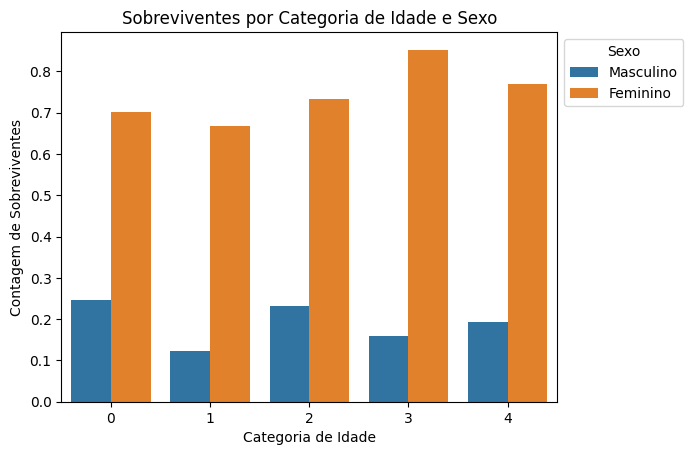

In [109]:
# Plotar o gráfico de barras agrupadas com base no sexo
sns.barplot(x='categoria_idade', y='Survived', hue='Sex', data=treino, errorbar=None)
plt.title('Sobreviventes por Categoria de Idade e Sexo')
plt.xlabel('Categoria de Idade')
plt.ylabel('Contagem de Sobreviventes')
# Mover a legenda para fora do plot
plt.legend(title='Sexo', labels=['Masculino', 'Feminino'], bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

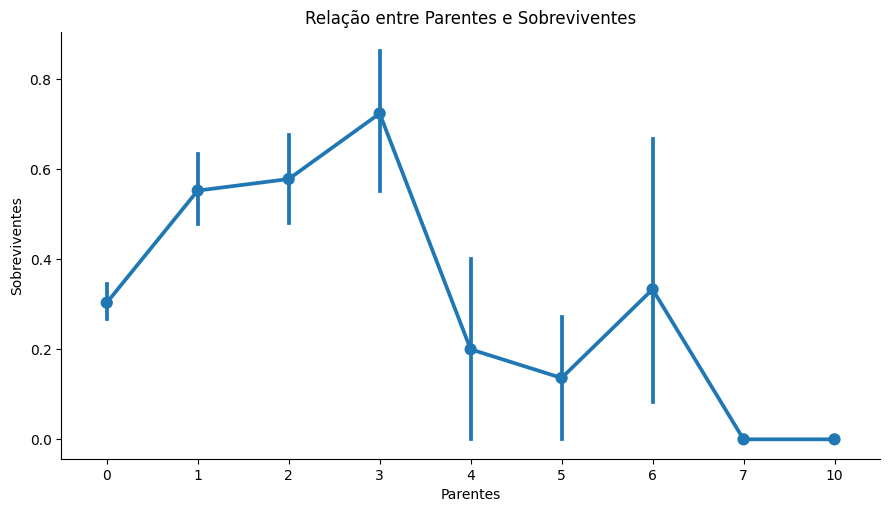

In [110]:
# Plotar o catplot com largura aumentada
sns.catplot(x='Parentes', y='Survived', data=treino, kind='point', aspect=1.8)

# Configurar o título e rótulos dos eixos
plt.title('Relação entre Parentes e Sobreviventes')
plt.xlabel('Parentes')
plt.ylabel('Sobreviventes')

# Exibir o gráfico
plt.show()


A probabilidade de sobrevivência é maior para passageiros que possuem 1, 2 e 3 parentes a bordo do Titanic, enquanto aqueles que têm menos de 1 ou mais de 3 parentes apresentam menor probabilidade de sobrevivência.

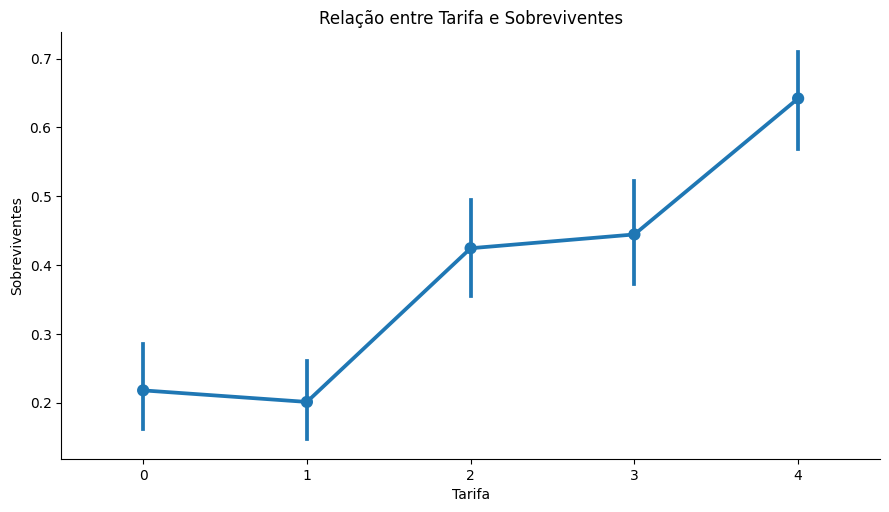

In [111]:
# Plotar o catplot com largura aumentada
sns.catplot(x='categoria_tarifa', y='Survived', data=treino, kind='point', aspect=1.8)

# Configurar o título e rótulos dos eixos
plt.title('Relação entre Tarifa e Sobreviventes')
plt.xlabel('Tarifa')
plt.ylabel('Sobreviventes')

# Exibir o gráfico
plt.show()


# Balancear os dados

In [113]:
X_train = treino.drop("Survived", axis=1)
y_train = treino["Survived"]
X_test  = teste.copy()

In [114]:
X_train.isnull().sum()

Pclass              0
Sex                 0
Age                 0
SibSp               0
Parch               0
Fare                0
Embarked            0
Titulos             0
categoria_idade     0
categoria_tarifa    0
Parentes            0
Sozinho             0
Deck                0
dtype: int64

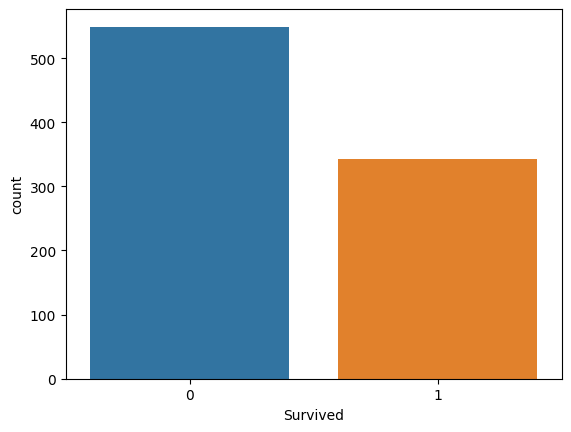

In [115]:
#variável target está desbalanceada
ax = sns.countplot(x='Survived', data=treino)

In [117]:
# balanceamento dos dados
cat = ['categoria_idade', 'categoria_tarifa']
smt = SMOTENC(categorical_features=cat, random_state=SEED)
X_train, y_train = smt.fit_resample(X_train, y_train)

#junção dos dados balanceados
dados_final = pd.concat([X_train, y_train], axis=1)

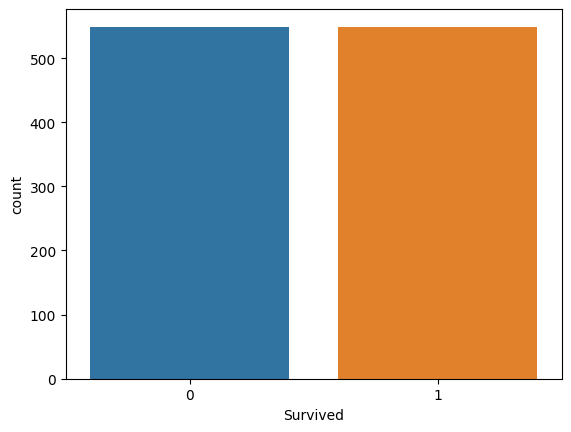

In [118]:
#variável target está balanceada
ax = sns.countplot(x='Survived', data=dados_final)

# Normalizar dados

In [119]:
norm = StandardScaler()

X_normalizado = norm.fit_transform(X_train)

# Separar entre teste e treino

In [120]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y_train, test_size=0.3, random_state=SEED)

# Criação dos Modelos de Machine Learning

## Modelo Vizinhos Proximos

In [121]:
#instanciar o modelo (criamos o modelo) - por padrão são 5 vizinhos  
knn = KNeighborsClassifier(metric='euclidean')
#treinando o modelo com os dados de treino
knn.fit(X_treino, y_treino)
#testando o modelo com os dados de teste
predito_knn = knn.predict(X_teste)
#score
score_knn = round(accuracy_score(y_teste, predito_knn)*100,2)
print(score_knn, '%')


79.7 %


## Modelo Berrnoulli

In [122]:
#criamos o modelo
bnb = BernoulliNB()
#treinar o modelo
bnb.fit(X_treino, y_treino)
#criamos o modelo
bnb = BernoulliNB()
#treinar o modelo
bnb.fit(X_treino, y_treino)
predito_BNb = bnb.predict(X_teste)
#score
score_Bnb = round(accuracy_score(y_teste, predito_BNb)*100,2)
print(score_Bnb, '%')

74.85 %


## Modelo Arvore de Decisao

In [123]:
#instanciando o modelo
dtc = DecisionTreeClassifier(criterion='entropy', random_state=SEED)
#treinar o modelo
dtc.fit(X_treino, y_treino)
predito_ArvoreDecisao = dtc.predict(X_teste)
#score
score_ArvoreDecisao = round(accuracy_score(y_teste, predito_ArvoreDecisao)*100,2)
print(score_ArvoreDecisao, '%')

80.61 %


## Random Forest

In [124]:
#instanciando o modelo
random_forest = RandomForestClassifier(n_estimators=100)
#treinar o modelo
random_forest.fit(X_treino, y_treino)
predito_RandomForest = random_forest.predict(X_teste)
#score
score_RandomForest = round(accuracy_score(y_teste, predito_RandomForest)*100,2)
print(score_RandomForest, '%')

82.12 %


## Logistic Regression

In [125]:
#instanciando o modelo
logreg = LogisticRegression()
#treinar o modelo
logreg.fit(X_treino, y_treino)
predito_Regression = logreg.predict(X_teste)
#score
score_Regression = round(accuracy_score(y_teste, predito_Regression)*100,2)
print(score_Regression, '%')


80.3 %


## Gaussian Naive Bayes

In [126]:
#instanciando o modelo
gaussian = GaussianNB()
#treinar o modelo
gaussian.fit(X_treino, y_treino)
predito_Gaussian = gaussian.predict(X_teste)
#score
score_Gaussian = round(accuracy_score(y_teste, predito_Gaussian)*100,2)
print(score_Gaussian, '%')

79.09 %


## Perceptron

In [127]:
#instanciando o modelo
perceptron = Perceptron(max_iter=10)
#treinar o modelo
perceptron.fit(X_treino, y_treino)
predito_Perceptron = perceptron.predict(X_teste)
#score
score_Perceptron = round(accuracy_score(y_teste, predito_Perceptron)*100,2)
print(score_Perceptron, '%')

79.39 %


c:\Users\muril\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


## Linear SVC

In [128]:
#instanciando o modelo
linear_svc = LinearSVC()
#treinar o modelo
linear_svc.fit(X_treino, y_treino)
predito_SVC = linear_svc.predict(X_teste)
#score
score_SVC = round(accuracy_score(y_teste, predito_SVC)*100,2)
print(score_SVC, '%')

80.3 %


c:\Users\muril\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# Comparação dos modelos

In [129]:
resultados = pd.DataFrame({
    'Model': ['KNN', 'Berrnoulli', 
              'Arvore de Decisao', 'Random Forest', 'Logistic Regression', 
              'Gaussian Naive Bayes', 
              'Perceptron', 'Linear SVC'],
    'Score': [score_knn, score_Bnb, score_ArvoreDecisao, score_RandomForest, score_Regression, score_Gaussian, 
              score_Perceptron, score_SVC]})
resultados

,Model,Score
0,KNN,79.70
1,Berrnoulli,74.85
2,Arvore de Decisao,80.61
3,Random Forest,82.12
4,Logistic Regression,80.30
5,Gaussian Naive Bayes,79.09
6,Perceptron,79.39
7,Linear SVC,80.30


# Avaliação do Modelo usando Cross Validation

Após compararmos os modelos e constatarmos que o Random Forest apresentou o maior score, é fundamental realizar uma avaliação mais robusta e realista do modelo. Para isso, utilizaremos o Cross Validation, uma técnica essencial para evitar problemas de overfitting ou underfitting e fornecer uma estimativa mais precisa do desempenho do modelo em dados não vistos.

Utilizaremos o método k-fold Cross Validation, em que o conjunto de dados é dividido em 10 partes iguais (k=10), conforme especificado pelo parâmetro `n_splits` do `KFold`. A opção `shuffle=True` indica que os dados serão embaralhados antes de divididos, tornando a divisão mais robusta.

O `cross_validate` é utilizado para realizar o processo de treinamento e teste do modelo em cada fold. Passamos o modelo, os dados de treino (`X_treino` e `y_treino`), o objeto `KFold` criado previamente (`cv`) e `return_train_score=False`, indicando que não queremos retornar o score do treinamento.

Após a execução do Cross Validation, obtemos os resultados do teste em cada fold e calculamos a média e o desvio padrão dos scores através dos resultados obtidos. Essas métricas nos fornecem uma noção da performance média e da variabilidade do modelo em diferentes conjuntos de teste.

Ao avaliar o resultado do Cross Validation, obtemos uma estimativa mais confiável da acurácia do modelo. No código, apresentamos a acurácia média com um intervalo de confiança de 95% usando a média e o desvio padrão dos scores dos testes.

Esse processo nos auxilia na escolha do modelo final e nos fornece uma visão mais sólida de como o modelo se comportará. Com base na acurácia obtida, podemos tomar decisões informadas sobre o uso desse modelo para previsões em novos dados.


In [130]:
np.random.seed(SEED)

modelo = RandomForestClassifier(n_estimators=100)
cv = KFold(n_splits = 10, shuffle=True)
results = cross_validate(modelo, X_treino, y_treino, cv = cv, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com Random Forest, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com Random Forest, 10 = [73.02, 91.28]


# Exploração de Hiperparâmetros com Random Forest

Nesta etapa do projeto, realizaremos a exploração de hiperparâmetros do modelo Random Forest. Os hiperparâmetros são configurações que afetam o processo de treinamento do modelo e, ao variá-los, podemos encontrar a melhor combinação para obter o melhor desempenho.

Para isso, criamos a função `roda_random_forest` que recebe como entrada três hiperparâmetros: `max_depth`, `min_samples_leaf` e `min_samples_split`. Esses parâmetros controlam a profundidade máxima da árvore, o número mínimo de amostras necessárias para serem consideradas uma folha e o número mínimo de amostras necessárias para dividir um nó interno, respectivamente.

A função utiliza a técnica de Cross Validation, em que o conjunto de dados é dividido em 10 partes iguais (k=10) para avaliar o desempenho do modelo em diferentes conjuntos de teste. Usamos o objeto `KFold` para realizar essa divisão.

Dentro da função, criamos um modelo Random Forest Classifier com os hiperparâmetros passados como argumentos. Em seguida, utilizamos o `cross_validate` para treinar e testar o modelo em cada fold, obtendo os resultados de tempo de treinamento (`fit_time`), tempo de teste (`score_time`), score de treinamento (`train_score`) e score de teste (`test_score`) para cada fold.

A função retorna esses resultados em uma tabela, que contém as configurações dos hiperparâmetros e as métricas de desempenho obtidas.

Em seguida, criamos a função `busca`, que realiza a exploração de hiperparâmetros variando o `max_depth`, `min_samples_leaf` e `min_samples_split` em faixas predefinidas (de 8 a 12 para `max_depth`, de 1 a 3 para `min_samples_leaf` e de 2 a 4 para `min_samples_split`). A função chama a função `roda_random_forest` para cada combinação de hiperparâmetros e armazena os resultados em um DataFrame.

Ao final da exploração, os resultados são ordenados pelo score de teste (`test`) em ordem decrescente, o que nos permitirá identificar as combinações de hiperparâmetros que obtiveram o melhor desempenho para o nosso modelo Random Forest.

Essa exploração nos ajudará a selecionar os melhores hiperparâmetros para nosso modelo, garantindo que ele esteja otimizado e pronto para realizar previsões precisas nos dados do Titanic.


In [131]:
def roda_random_forest(max_depth, min_samples_leaf, min_samples_split):
  np.random.seed(SEED)

  cv = KFold(n_splits = 10, shuffle=True)
  modelo = RandomForestClassifier(max_depth=max_depth, min_samples_leaf = min_samples_leaf, min_samples_split = min_samples_split)
  results = cross_validate(modelo, X_treino, y_treino, cv = cv, return_train_score=True)
  fit_time = results['fit_time'].mean()
  score_time = results['score_time'].mean()
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  tabela = [max_depth, min_samples_leaf, min_samples_split, train_score, test_score, fit_time, score_time]
  return tabela

def busca():
  resultados = []
  for max_depth in range(8,13):
    for min_samples_leaf in range(1,4):
      for min_samples_split in range(2,5):
        tabela = roda_random_forest(max_depth, min_samples_leaf, min_samples_split)
        resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns= ["max_depth","min_samples_leaf","min_samples_split","train","test", "fit_time", "score_time"])
  return resultados

resultados = busca()
resultados.sort_values(by='test', ascending=False, inplace=True)
resultados

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
10,9,1,3,93.373828,83.583390,0.211561,0.011460
28,11,1,3,95.920213,83.581681,0.227631,0.012066
3,8,2,2,89.944957,83.456938,0.202927,0.011486
4,8,2,3,89.944957,83.456938,0.222683,0.011681
5,8,2,4,89.944957,83.456938,0.210962,0.012590
9,9,1,2,93.937976,83.321941,0.222922,0.011161
29,11,1,4,94.878307,83.188653,0.217892,0.011281
0,8,1,2,92.158449,83.063910,0.226500,0.011580
43,12,3,3,89.771254,83.062201,0.222398,0.012364
42,12,3,2,89.771254,83.062201,0.198163,0.011066


<Axes: xlabel='max_depth', ylabel='train'>

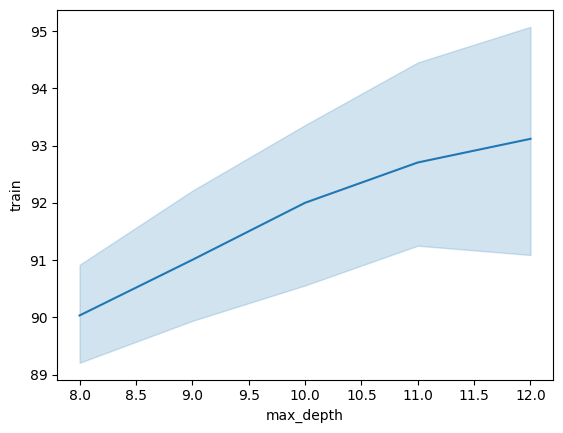

In [132]:
import seaborn as sns

sns.lineplot(x = "max_depth", y = "train", data = resultados)

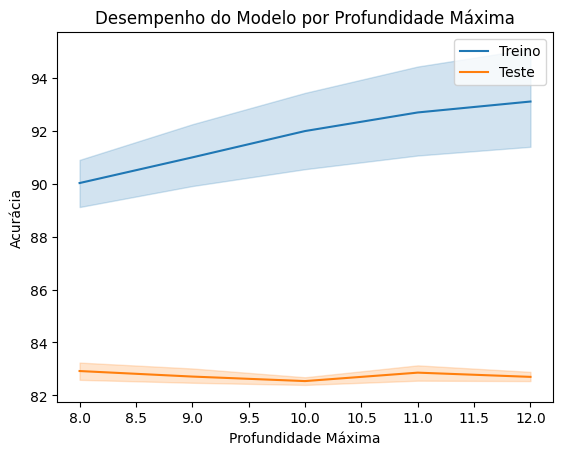

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x="max_depth", y="train", data=resultados, label="Treino")
sns.lineplot(x="max_depth", y="test", data=resultados, label="Teste")

# Definindo o título e os rótulos dos eixos
plt.title("Desempenho do Modelo por Profundidade Máxima")
plt.xlabel("Profundidade Máxima")
plt.ylabel("Acurácia")

# Adicionando a legenda
plt.legend()

# Exibindo o gráfico
plt.show()


# Exploração de Espaço de Hiperparâmetros com GridSearch

Nesta etapa do projeto, realizaremos a exploração de um espaço de hiperparâmetros usando a técnica GridSearch. O GridSearch é uma técnica de busca exaustiva que permite explorar diferentes combinações de hiperparâmetros para encontrar a melhor configuração para o nosso modelo Random Forest.

Antes de iniciar a busca, definimos uma semente aleatória (`SEED`) para garantir a reprodutibilidade dos resultados. Em seguida, criamos um dicionário `espaco_de_parametros` que contém os hiperparâmetros que desejamos explorar e suas respectivas faixas de valores para busca. Nesse caso, estamos variando os seguintes hiperparâmetros:

- `n_estimators`: número de árvores na floresta, variando de 108 a 114.
- `max_depth`: profundidade máxima das árvores, variando de 9 a 12.
- `min_samples_leaf`: número mínimo de amostras necessárias para serem consideradas uma folha, variando de 1 a 2.
- `min_samples_split`: número mínimo de amostras necessárias para dividir um nó interno, variando de 2 a 3.
- `criterion`: critério para medir a qualidade de uma divisão (gini ou entropy).

Em seguida, utilizamos o `GridSearchCV`, que é uma função do Scikit-learn que realiza a busca exaustiva no espaço de hiperparâmetros fornecido. Essa função recebe como argumentos o modelo que será utilizado (no caso, `RandomForestClassifier`), o espaço de parâmetros a ser explorado e a validação cruzada (`KFold`) com 10 folds para avaliar o desempenho do modelo em diferentes conjuntos de teste.

O `GridSearchCV` executa o treinamento e avaliação do modelo para todas as combinações possíveis dos hiperparâmetros fornecidos. Ao final da busca, ele retorna um objeto contendo os resultados dessa exploração.

Os resultados são armazenados em um DataFrame chamado `resultados_grid`, que contém informações sobre os hiperparâmetros testados, os scores de treinamento e teste, bem como outras métricas relevantes para cada combinação de hiperparâmetros.

Essa exploração nos permitirá encontrar os melhores hiperparâmetros para nosso modelo Random Forest, resultando em um modelo otimizado e com melhor desempenho para realizar previsões precisas nos dados do Titanic.


In [134]:
np.random.seed(SEED)

espaco_de_parametros = {
    "n_estimators" : range(108,115),
    "max_depth" : range(9,13),
    "min_samples_leaf" : range(1,3),
    "min_samples_split" : range(2,4),
    "criterion" : ["gini", "entropy"]
}

busca = GridSearchCV(RandomForestClassifier(),
                    espaco_de_parametros,
                    cv = KFold(n_splits = 10, shuffle=True))
busca.fit(X_treino, y_treino)
resultados_grid = pd.DataFrame(busca.cv_results_)
resultados_grid.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.240164,0.018429,0.013852,0.004497,gini,9,1,2,108,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",...,0.831169,0.922078,0.922078,0.831169,0.792208,0.828947,0.763158,0.831938,0.061660,58
1,0.229819,0.010655,0.011915,0.001565,gini,9,1,2,109,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",...,0.844156,0.883117,0.922078,0.831169,0.792208,0.815789,0.763158,0.833219,0.045838,45
2,0.237613,0.032634,0.012123,0.001364,gini,9,1,2,110,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",...,0.844156,0.896104,0.948052,0.831169,0.792208,0.828947,0.736842,0.834501,0.062300,37
3,0.237292,0.011544,0.013451,0.001685,gini,9,1,2,111,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",...,0.818182,0.909091,0.922078,0.831169,0.818182,0.828947,0.736842,0.834501,0.062029,37
4,0.236283,0.010261,0.013108,0.000939,gini,9,1,2,112,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",...,0.844156,0.909091,0.909091,0.818182,0.831169,0.828947,0.763158,0.837133,0.049170,8


In [135]:
resultados_grid.sort_values("rank_test_score", ascending=True).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
62,0.238468,0.004174,0.013663,0.001275,gini,11,1,2,114,"{'criterion': 'gini', 'max_depth': 11, 'min_sa...",...,0.831169,0.922078,0.909091,0.831169,0.792208,0.842105,0.763158,0.843643,0.054932,1
75,0.228496,0.007443,0.012217,0.001119,gini,11,2,2,113,"{'criterion': 'gini', 'max_depth': 11, 'min_sa...",...,0.844156,0.909091,0.922078,0.831169,0.805195,0.828947,0.802632,0.842379,0.047965,2
181,0.402024,0.071478,0.016607,0.003109,entropy,11,1,3,114,"{'criterion': 'entropy', 'max_depth': 11, 'min...",...,0.844156,0.922078,0.896104,0.857143,0.805195,0.842105,0.736842,0.841012,0.054129,3
59,0.246067,0.026594,0.012373,0.001557,gini,11,1,2,111,"{'criterion': 'gini', 'max_depth': 11, 'min_sa...",...,0.844156,0.896104,0.922078,0.870130,0.818182,0.828947,0.723684,0.840977,0.059347,4
177,0.241992,0.005109,0.012163,0.001773,entropy,11,1,3,110,"{'criterion': 'entropy', 'max_depth': 11, 'min...",...,0.831169,0.909091,0.909091,0.844156,0.805195,0.842105,0.763158,0.839747,0.051092,5


Após a busca, utilizamos o atributo `best_estimator_` do objeto `busca` para obter o modelo que teve o melhor desempenho. Esse modelo é armazenado na variável `melhor`. Em seguida, utilizamos a função `print()` para exibir as configurações desse modelo.

Essa abordagem nos permite encontrar o conjunto de hiperparâmetros que otimiza o desempenho do modelo de acordo com a validação cruzada utilizada no `GridSearchCV`.

E esse modelo é RandomForestClassifier(max_depth=11, n_estimators=114)

In [136]:
melhor = busca.best_estimator_
print(melhor)

RandomForestClassifier(max_depth=11, n_estimators=114)


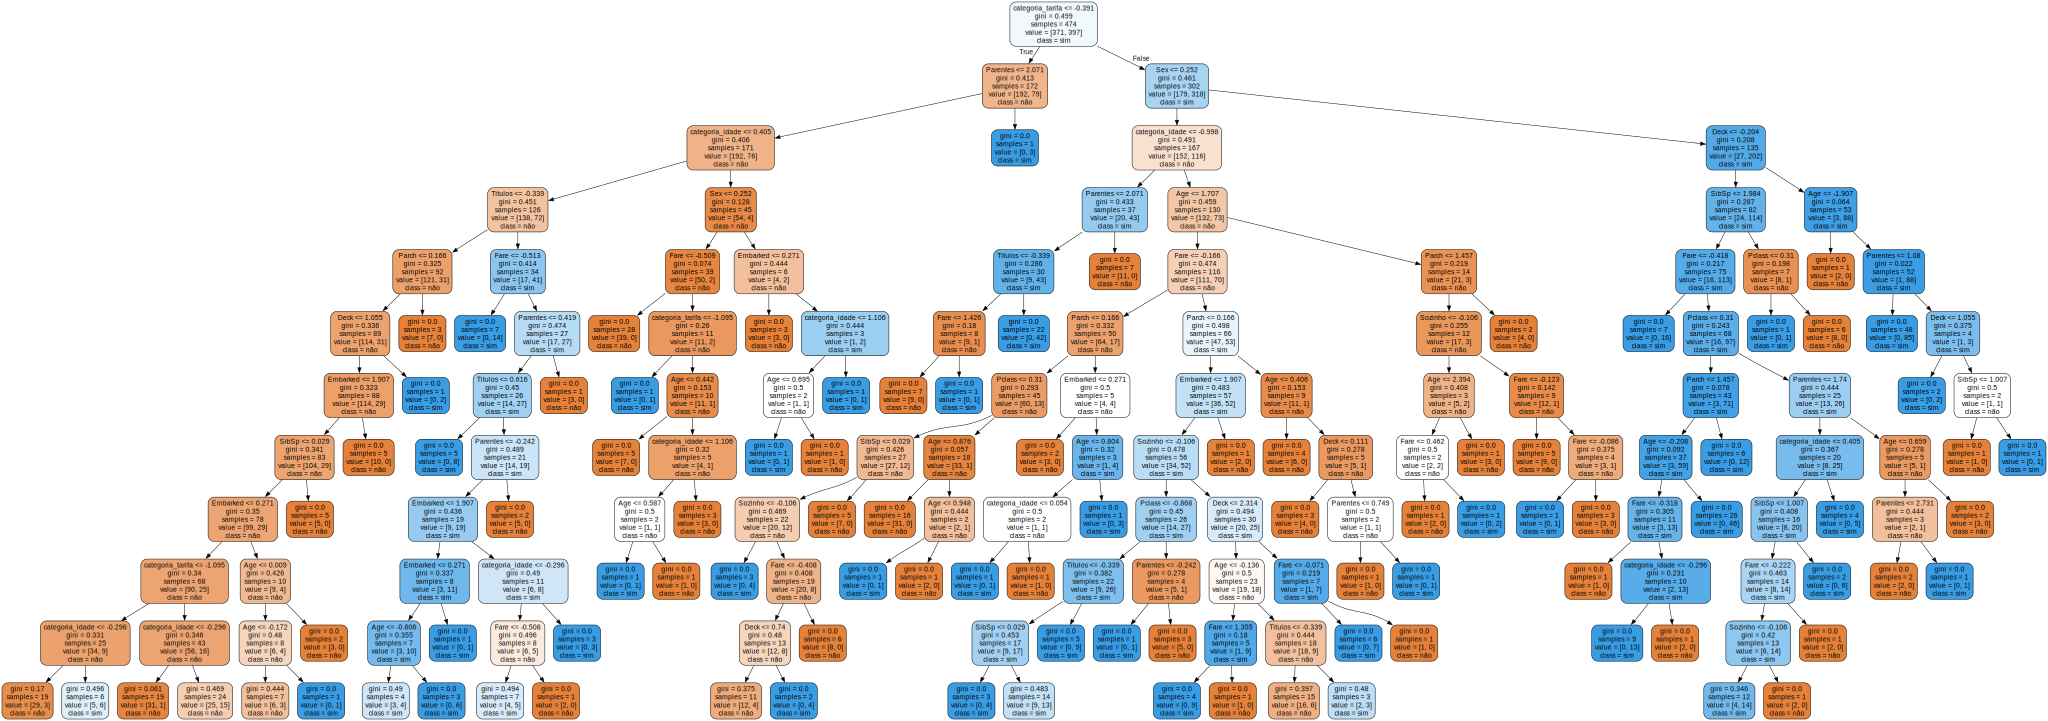

In [137]:
from sklearn.tree import export_graphviz
import graphviz

features = X_train.columns
dot_data = export_graphviz(melhor[0], out_file=None, filled=True, rounded=True,
                          class_names=["não","sim"],
                          feature_names = features)
graph = graphviz.Source(dot_data)
graph

Após o treinamento do modelo, utilizamos o atributo 'feature_importances_' para obter as importâncias de cada feature (variável explicativa) no processo de tomada de decisão do modelo. Essas importâncias são representadas por parâmetros.

Com base nas importâncias obtidas, criamos um DataFrame chamado 'parametros_df' para armazenar as informações, associando cada feature ao seu respectivo parâmetro de importância. O DataFrame é ordenado em ordem decrescente com base nos parâmetros, garantindo que as features mais relevantes apareçam primeiro na tabela.

Por fim, definimos a coluna 'Feature' como índice do DataFrame para facilitar a visualização e exibimos o resultado, apresentando a tabela com as importâncias das features. Essa análise nos permite identificar quais variáveis tiveram maior relevância no processo de classificação do modelo.

In [138]:
from sklearn.ensemble import RandomForestClassifier

# Crie e treine o modelo de Random Forest
modelo_rf = melhor
modelo_rf.fit(X_treino, y_treino)

# Obtenha a importância das features
parametros = modelo_rf.feature_importances_

# Crie um DataFrame com as importâncias e as respectivas features
parametros_df = pd.DataFrame({'Feature': X_train.columns, 'Parametro': parametros})

# Ordene o DataFrame em ordem decrescente pelo parametro
parametros_df = parametros_df.sort_values(by='Parametro', ascending=False)

parametros_df.set_index('Feature', inplace=True)

# Exiba o DataFrame
parametros_df


,Parametro
Feature,
Titulos,0.212541
Fare,0.165670
Age,0.153050
Sex,0.107384
Pclass,0.060197
categoria_tarifa,0.056162
Deck,0.051827
categoria_idade,0.051825
Parentes,0.044412


In [139]:
#instanciando o modelo
random_forest = melhor
#treinar o modelo
random_forest.fit(X_treino, y_treino)
predito_RandomForest = random_forest.predict(X_teste)
#score
score_RandomForest = round(accuracy_score(y_teste, predito_RandomForest)*100,2)
print(score_RandomForest, '%')

82.42 %


In [140]:
teste

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titulos,categoria_idade,categoria_tarifa,Parentes,Sozinho,Deck
0,3,0,34.5,0,0,7.8292,2,0,3,1,0,1,0
1,3,1,47.0,1,0,7.0000,0,1,4,0,1,0,0
2,2,0,62.0,0,0,9.6875,2,0,4,1,0,1,0
3,3,0,27.0,0,0,8.6625,0,0,2,1,0,1,0
4,3,1,22.0,1,1,12.2875,0,1,1,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,23.0,0,0,8.0500,0,0,1,1,0,1,0
414,1,1,39.0,0,0,108.9000,1,4,3,4,0,1,3
415,3,0,38.5,0,0,7.2500,0,0,3,0,0,1,0
416,3,0,39.0,0,0,8.0500,0,0,3,1,0,1,0


In [144]:
teste.isnull().sum()

Pclass              0
Sex                 0
Age                 0
SibSp               0
Parch               0
Fare                1
Embarked            0
Titulos             0
categoria_idade     0
categoria_tarifa    1
Parentes            0
Sozinho             0
Deck                0
dtype: int64

In [142]:
X_test  = teste.copy()
X_teste_norm = norm.fit_transform(X_test)

#instanciando o modelo
random_forest = melhor
#treinar o modelo
random_forest.fit(X_treino, y_treino)
predito_RandomForest = random_forest.predict(X_teste_norm)

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values